<a href="https://colab.research.google.com/github/miu0001/Statistical_Inference/blob/master/6.2%20Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Stem-and-Leaf Display in Python

def stem_and_leaf(df, column):
    data = sorted(df[column].tolist())
    stem_leaf = {}
    for value in data:
        stem, leaf = divmod(value, 10)  # tens digit = stem, ones digit = leaf
        stem_leaf.setdefault(stem, []).append(leaf)

    result = pd.DataFrame({
        "Stem": list(stem_leaf.keys()),
        "Leaves": [" ".join(str(l) for l in leaves) for leaves in stem_leaf.values()],
        "Frequency": [len(leaves) for leaves in stem_leaf.values()]
    })
    return result

In [ ]:
# Given dataset (50 exam scores)
test_scores = [
    93, 77, 67, 72, 52, 83, 66, 84, 59, 63,
    75, 97, 84, 73, 81, 42, 61, 51, 91, 87,
    34, 54, 71, 47, 79, 70, 65, 57, 90, 83,
    58, 69, 82, 76, 71, 60, 38, 81, 74, 69,
    68, 76, 85, 58, 45, 73, 75, 42, 93, 65
]
df_scores = pd.DataFrame({'values' : test_scores})
stem_and_leaf(df_scores, 'values')

,Stem,Leaves,Frequency
0,3,4 8,2
1,4,2 2 5 7,4
2,5,1 2 4 7 8 8 9,7
3,6,0 1 3 5 5 6 7 8 9 9,10
4,7,0 1 1 2 3 3 4 5 5 6 6 7 9,13
5,8,1 1 2 3 3 4 4 5 7,9
6,9,0 1 3 3 7,5


In [ ]:
# ACT composite scores dataset
scores = [
    26, 19, 22, 28, 31, 29, 25, 23, 20, 33, 23, 26,
    30, 27, 26, 29, 20, 23, 18, 24, 29, 27, 32, 24,
    25, 26, 22, 29, 21, 24, 20, 28, 23, 26, 30, 19,
    27, 21, 32, 28, 29, 23, 25, 21, 28, 22, 25, 24,
    19, 24, 35, 26, 25, 20, 31, 27, 23, 26, 30, 29
]

# Create dataframe with scores in a column
df_act = pd.DataFrame({'ACT Score' : scores})
stem_and_leaf(df_act, "ACT Score")

,Stem,Leaves,Frequency
0,1,8 9 9 9,4
1,2,0 0 0 0 1 1 1 2 2 2 3 3 3 3 3 3 4 4 4 4 4 5 5 ...,47
2,3,0 0 0 1 1 2 2 3 5,9


In [ ]:
# Box and whisker diagram
def boxplot(df, column):
    """
    Create a simple box-and-whisker plot for a column in a DataFrame.
    """
    plt.boxplot(df[column], vert=True)
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.show()

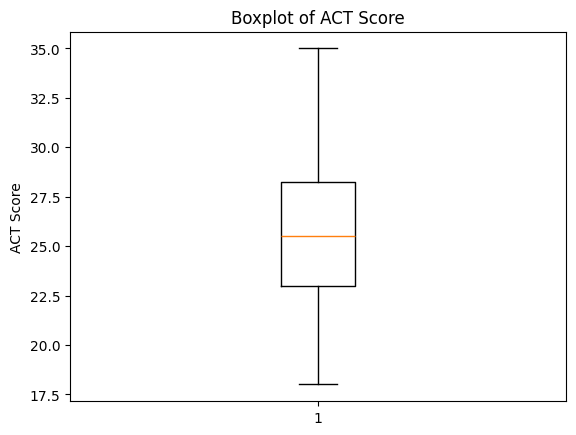

In [ ]:
boxplot(df_act, "ACT Score")

In [ ]:
# Improved Box and Whisker Plot
def newboxplot(df, column):
    """
    Create a styled box-and-whisker plot for a column in a DataFrame.
    """
    fig, ax = plt.subplots(figsize=(6, 6))

    # Create boxplot with styling
    ax.boxplot(
        df[column],
        vert=True,
        patch_artist=True,       # enables fill color
        boxprops=dict(facecolor="lightblue", color="navy", linewidth=1.5),
        whiskerprops=dict(color="navy", linewidth=1.5),
        capprops=dict(color="navy", linewidth=1.5),
        medianprops=dict(color="red", linewidth=2),
        flierprops=dict(marker='o', markerfacecolor="orange", markersize=6, alpha=0.6)
    )

    # Titles and labels
    ax.set_title(f"Boxplot of {column}", fontsize=14, fontweight="bold")
    ax.set_ylabel(column, fontsize=12)
    ax.grid(True, axis="y", linestyle="--", alpha=0.6)

    plt.show()

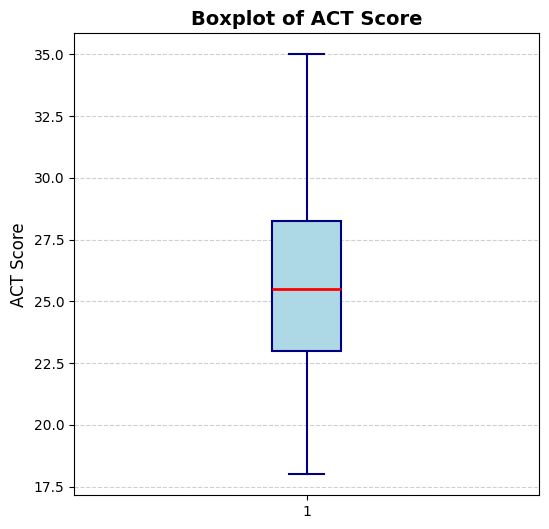

In [ ]:
newboxplot(df_act, "ACT Score")